In [108]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.vq import kmeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from matplotlib import cm
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
print('Libraries imported.')

Libraries imported.


## Q1) K-Means Clustering

K-means clustering is a method which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In this question you will use K-Means clustering for 2 different examples
1. Implementing _k_-means clustering on a randomly generated dataset from scratch.
2. Implementing _k_-means using the SK-Learn library for cluster segmentation and profile building.

### Q1 a) *k*-means on a Randomly Generated Dataset
42 data points belonging to 2 different clusters have been assigned  
x1 is the first feature and x2 the second

In [162]:
x1 = [1.9, -4.1, 2.1, -1.8, -2.3, 3.6, 1.9, 4.6, 1.3, 2.5, -1.6, 3.1, -1.2, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [3.0, -2.9, 2.6, -0.9, -3.1, -1.3, 2.7, 1.4, -0.1, 1.9, -1.3, 3.7, -2.0, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]
x1 = np.array(x1)
x2 = np.array(x2)

In [163]:
centers = [[-1, 1], [1, -1]]
colors_map = np.array(['b', 'r'])

#### Define a function that assigns each datapoint to a cluster
In this first part of Q1 you will have to implement K-Means Clustering from scratch. As you have studied in class that centers are first chosen at random, however here we have initialized the centers for you as `[[-1,-1],[-1,-1]]` for ease in checking which also means we have already chosen the number of clusters to equal 2.

In the first function `assign_members` you will take both features along with the centers as parameters and will assign the colours and class of points to both clusters according to their centers. You will then return colours and class of points to feed into the next function.

Hint: Think of class of points as a boolean array for each cluster

In [180]:
def assign_members(x1, x2, centers):
    #Your code goes here
    c_ass=[]
    classs = []
    for i in range(len(x1)):
      d1 = np.linalg.norm(np.array([x1[i],x2[i]]) - np.array(centers[0]))
      d2 = np.linalg.norm(np.array([x1[i],x2[i]]) - np.array(centers[1]))
      if d1 <= d2:
        c_ass.append('b')
        classs.append(0)
      else:
        c_ass.append('r')
        classs.append(1)

    return c_ass,np.array(classs)

#### Define a function that updates the centroid of each cluster

Write a function that updates the center points, `update_centers` in which you will take along with both features and the 'class of points' as parameter and returns the updated centers.

In [181]:
def update_centers(x1, x2, class_of_points):
    # Your code goes here
    blue1 = []
    blue2 = []
    red1 = []
    red2 = []
    for i in range(len(x1)):
      if (class_of_points[i]==0):
        blue1.append(x1[i])
        blue2.append(x1[i])
      else:
        red1.append(x1[i])
        red2.append(x1[i])
    
    return [[sum(blue1)/len(blue1),sum(blue2)/len(blue2)],[sum(red1)/len(red1),sum(red2)/len(red2)]]

You dont have to implement the `plot_points` function as it has already been implemented for you. All you have to know is it takes centers and an array of colours and a figure title as its parameters. However if you wish to change it then you may do so.

In [182]:
# Dont change this function
def plot_points(centroids=None, colors='g', figure_title=None):
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    ax.set_title(figure_title, fontsize=24)

    plt.show()

#### Initialize data points and centers and plot

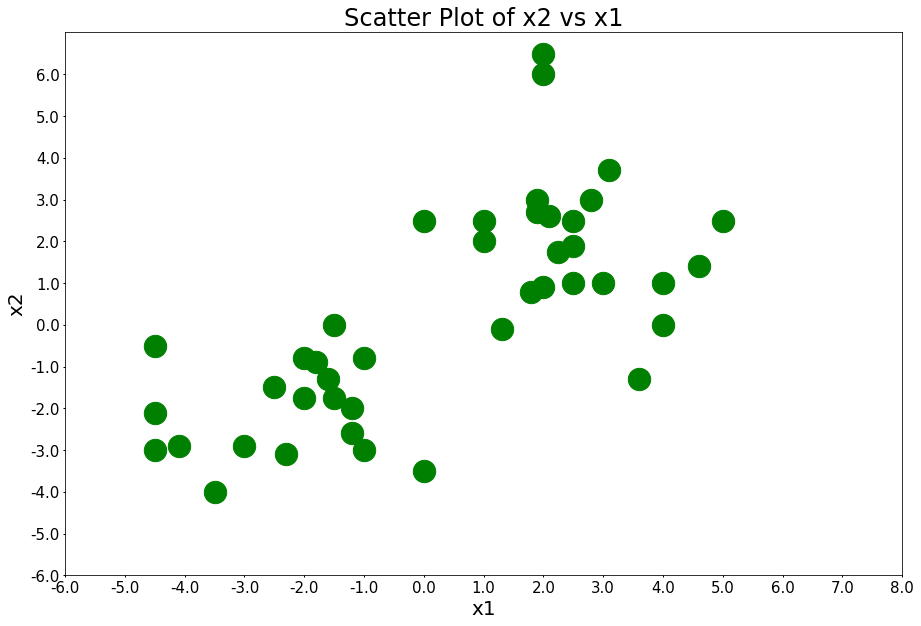

In [183]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

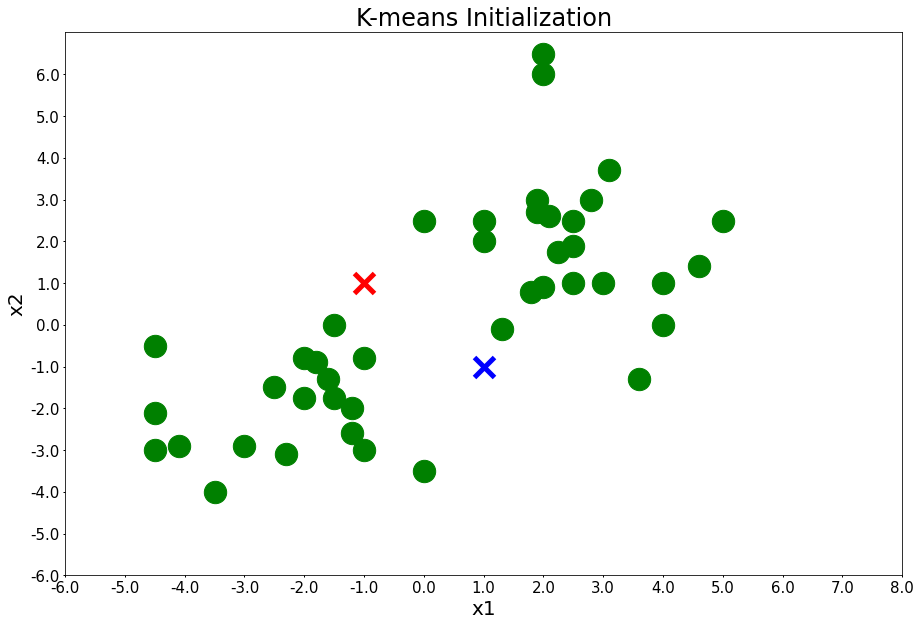

In [184]:
plot_points(centers, figure_title='K-means Initialization')

#### Run the iterations 4 times and plot each cluster assignment and plot each center update
Now use the functions that you have implemented and fill out the for loop  
You have to plot two scatter plot for each iteration, one after the cluster assignment and the second after updating the centers   

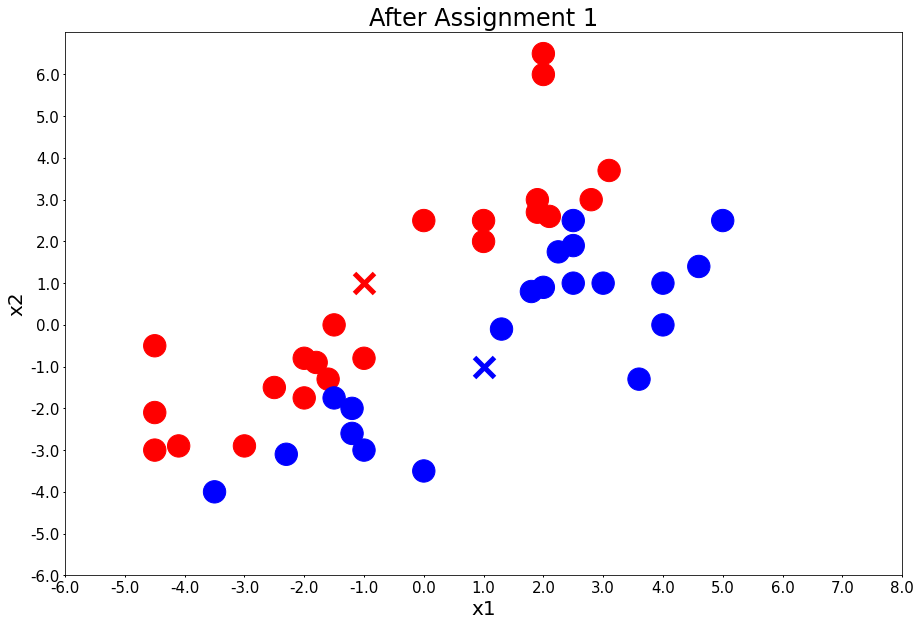

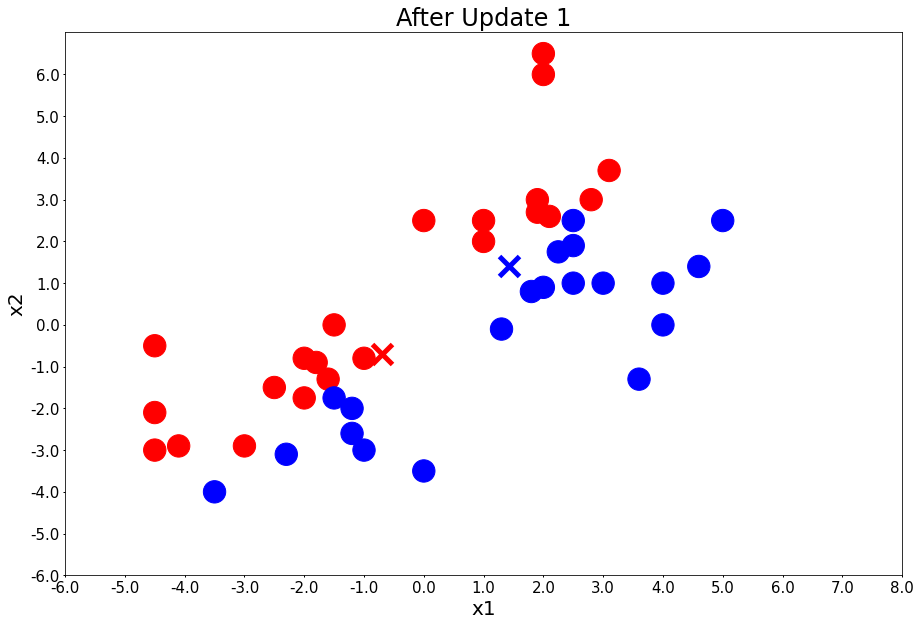

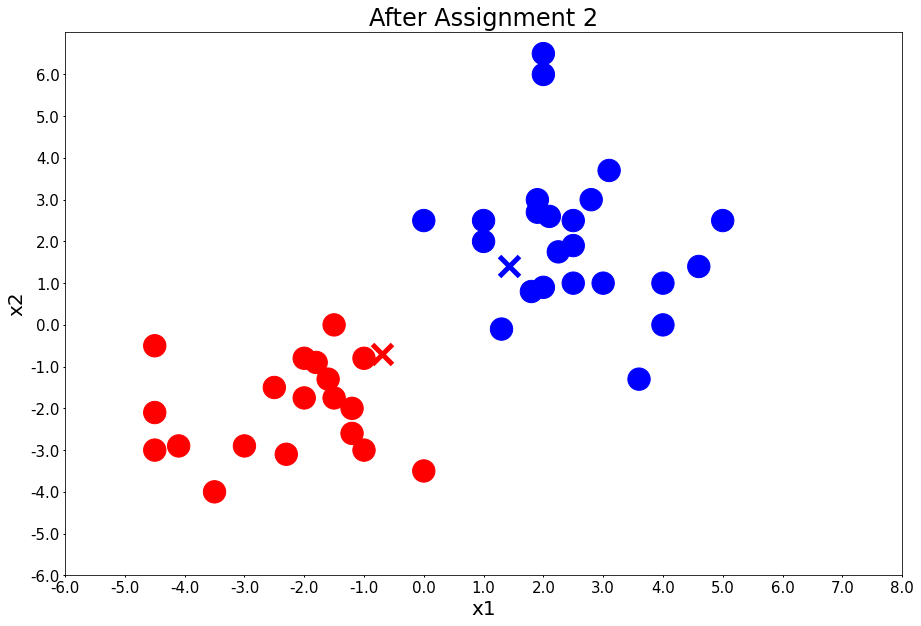

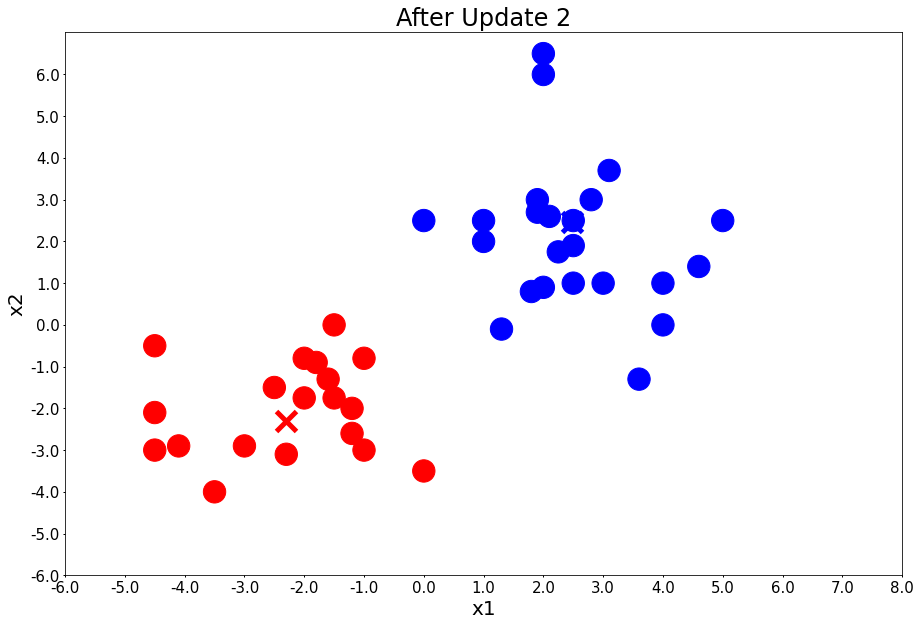

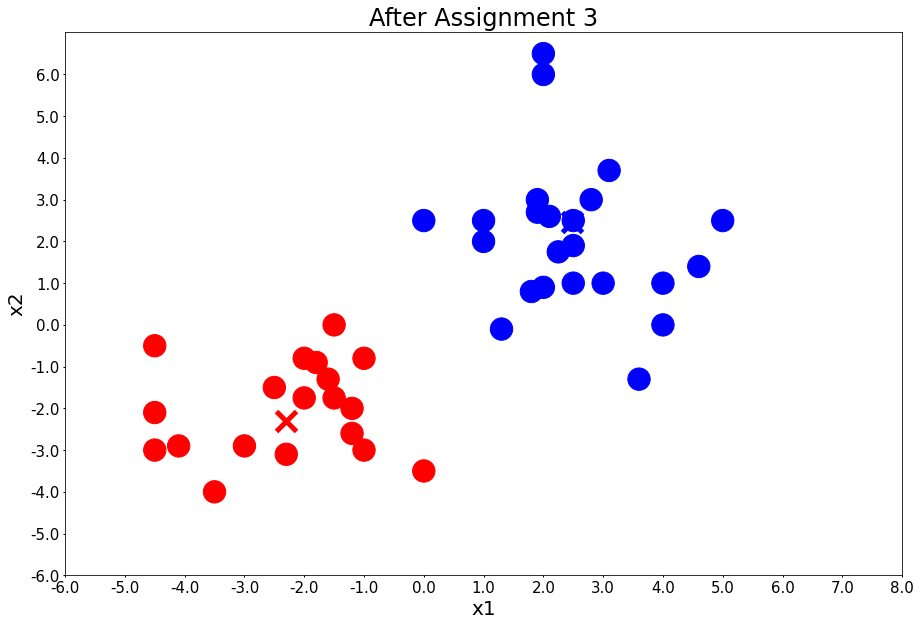

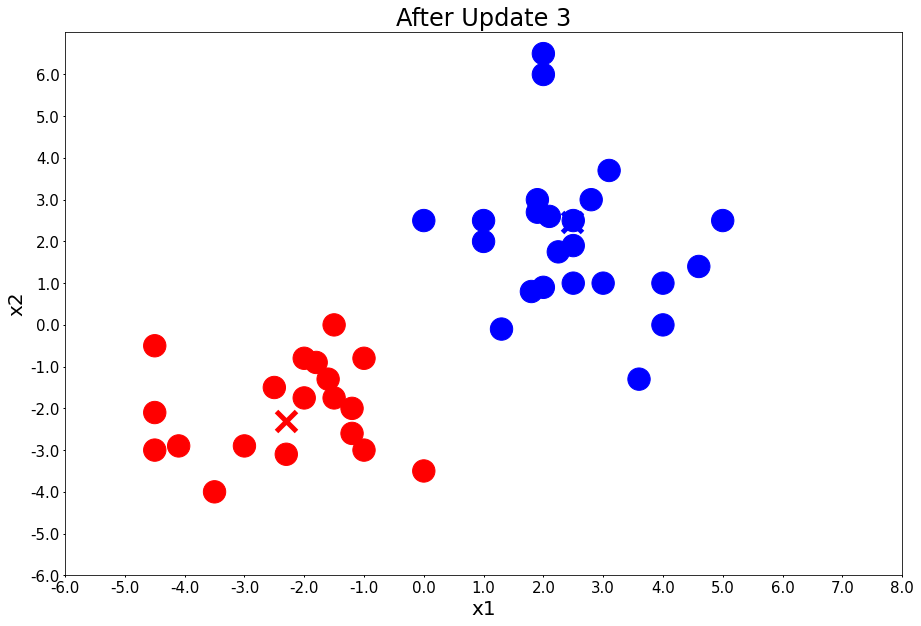

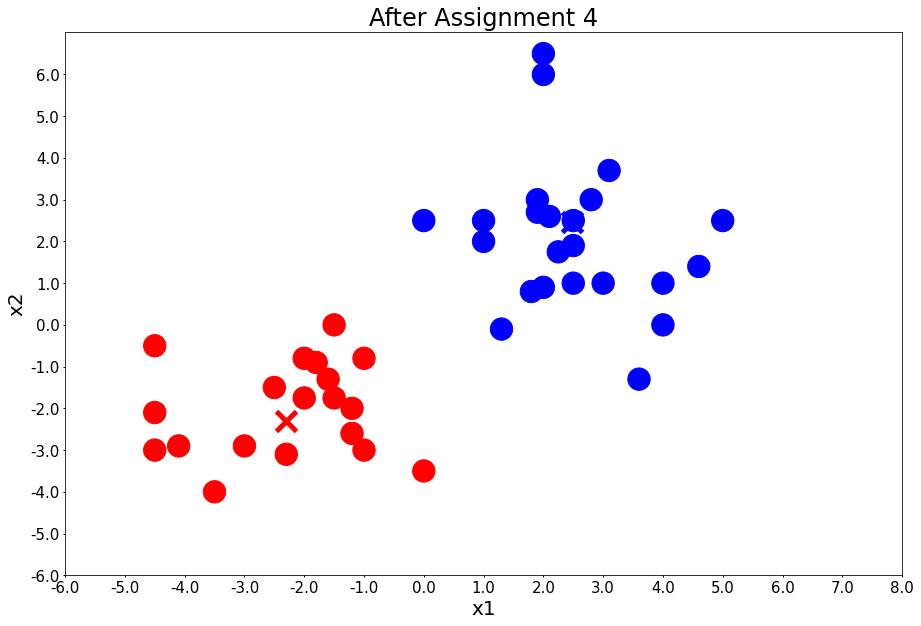

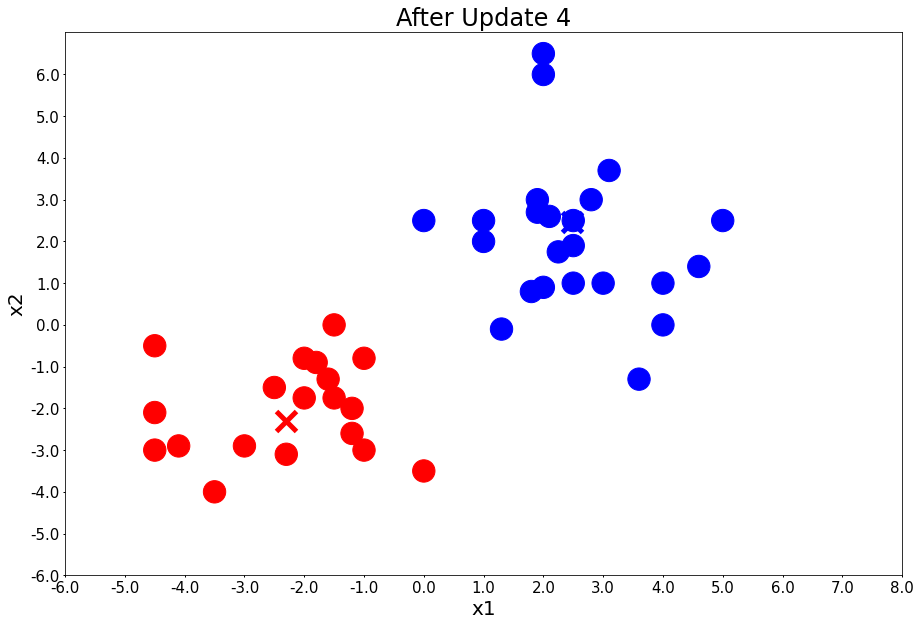

In [185]:
centers = [[1, -1], [-1, 1]]
number_of_iterations = 4
for i in range(0,number_of_iterations):
    # Your code goes here
  cols,classes = assign_members(x1,x2,centers)
  plot_points(centers, cols, 'After Assignment '+str(i+1))

  centers = update_centers(x1,x2,classes)
  plot_points(centers, cols, 'After Update '+str(i+1))



### Q1 b) *k*-means for Cluster Segmentation and Profile Building

**Step 1)** Read the customer_segemntation csv file into a dataframe and display the first 5 rows

In [134]:
# Your code goes here
c_s = pd.read_csv('/content/customer_segmentation.csv')
c_s.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


**Step 2)** Drop any columns which will not be of any use (if any) and display the first 5 rows

In [136]:
# Your code goes here
c_s.drop(['Customer Id','Address'],1,inplace=True)

**Question:** Explain why you dropped those columns (if any)?

**Answer:** Because address is not numeric and customer Id has no significance in determining the right cluster.

**Step 3)** Check to see if there any NaN entries. Show the count of Nan entries for each column

In [137]:
# Your code goes here
print('Following are the number of null values:')
c_s.isnull().sum()

Following are the number of null values:


Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

**Step 4)** You can either drop these Nan entries or fill in the missing values. Show the first 5 rows and the count of Nan entries for each column after you have either dropped or filled the missing values

In [138]:
#Your code goes here
c_s = c_s.fillna(0)
print('Following are the number of null values:')
c_s.isnull().sum()

Following are the number of null values:


Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

**Question:** Which method did you use to finish the NaN entries? And why is that method better than the other for K-Means clustering?

**Answer:** I filled the null values(in defaulted) with mode because it is a binary variable so filling it with mean wont make sense. Back fill is also not appropriate

**Step 5)** Normalize your data and convert it into a numpy array. Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally    
Hint: To Normalize checkout SKLearn library for any inbuilt function

In [144]:
# Your code goes here
X = StandardScaler().fit_transform(c_s.values)
X

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

**Step 6)** Here you will now use SK Learn's library for K-Means. 
You will use 4 clusters here.
Initailize the `n_init` parameter to equal 12

In [145]:
# Your code goes here

# Initialize
kmeans = KMeans(n_clusters=4,n_init=12)
# Fit
kmeans = kmeans.fit(X)
# Print labels
labels = kmeans.labels_
labels

array([0, 1, 3, 0, 2, 1, 0, 0, 0, 1, 3, 0, 0, 1, 3, 0, 0, 0, 1, 1, 0, 0,
       3, 1, 2, 1, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 3, 3, 0, 1, 3, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 3, 1, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 3, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0, 0,
       3, 3, 1, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 2, 1, 3, 3, 1, 0, 0, 0, 1,
       1, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 3, 3, 0, 0, 0, 2, 0, 1, 3, 0, 0, 0, 1, 3, 0,
       0, 1, 1, 1, 3, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 3,
       1, 0, 3, 1, 3, 0, 0, 2, 3, 3, 0, 0, 1, 0, 0, 1, 1, 3, 1, 0, 0, 1,
       2, 0, 1, 0, 3, 0, 0, 3, 0, 1, 1, 3, 0, 0, 0, 1, 0, 3, 3, 2, 1, 1,
       3, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 3, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 0, 0, 0, 0, 1, 3,
       1, 3, 0, 1, 0, 0, 3, 0, 0, 1, 0, 3, 3, 3, 0, 0, 0, 2, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 3, 0, 0, 3, 0, 3, 1, 1,

**Question:** Here you have been provided with the number of clusters from before. Give two methods where you can find out the optimal number of clusters?  
**Answer:**  Elbow method and average silhoutte method

**Step 7)** Add a column to your original dataframe with these labels and name the column `Labels`

In [146]:
# Your code goes here
c_s['Labels'] = kmeans.labels_

**Step 8)** Visualize your clusters. X is the normalized numpy array. You dont need to implement this, it has already been done for you. The following image shows what the result should more or less look like.
![Visual](Clusters.PNG)

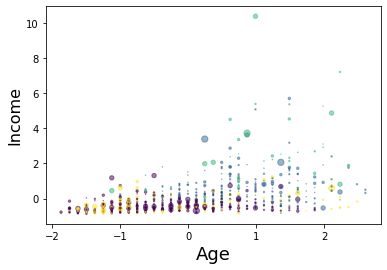

In [147]:
#Do not change this
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

**Step 9)** Here you will do profile building

K-means will partition your customers into four groups since we specified the algorithm to generate 4 clusters. The customers in each cluster are similar to each other in terms of the features included in the dataset.

Now we can create a profile for each group, considering the common characteristics of each cluster. 

Compare all 4 clusters and give main characterstics for each profile/cluster.  
For E.g The group which is older in `age` have a higher `income`

Hint: Use groupby

In [155]:
# Your code goes here
gby = c_s.groupby('Labels').mean()
gby

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Labels,,,,,,,,
0,32.078014,1.645390,5.730496,30.851064,0.741374,1.612076,0.000000,7.933570
1,41.619910,1.601810,15.904977,71.923077,1.946240,4.266186,0.009050,9.828507
2,42.902439,2.292683,16.902439,135.146341,8.120659,12.959537,0.463415,19.536585
3,31.812121,1.878788,3.933333,31.442424,1.597758,2.793218,0.981818,14.041818


Characteristics for each cluster  
1. Young people with less experience have high debt to income ratio
2. Older people with low income have low debt to income ratio
3. Older people with high income have the highest debt debt
4. Young people  have the higest debt to income ratio

**Question:** Give 2 advantages and 2 disavantages of using K Means Clustering over say a Hierarchal Clustering Method such a Agglomerative Clustering or a Density Based Clustering Method such as DB-Scan?

**Advantages**
1. Faster than Hierarchal Clustering
2. Produces tighter clusters

**Disadvantages**
1. Difficult to determine cluster value at the start
2. Does not work well with clusters of different size and destiny

**Step 10)**
Save your data frame from step, 9 to an Excel or csv file format.

In [156]:
#Your code goes here
gby.to_csv('step10.csv',index=False)

## Q2) Hierarchical  Clustering
Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. There are two types of hierarchical clustering algorithms:

*   Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.
*   Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

In this question, you will be performing Agglomerative Clustering on a customers shopping habits dataset (in the file customers_shopping.csv) and then labelling the clusters.

**Question** Load the dataset and look for possible missing values. Handle them appropriately. (If any) 

In [159]:
### Code here
customer = pd.read_csv('/content/customers_shopping.csv')
customer.drop('Genre',axis=1,inplace=True)
customer.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [106]:
customer.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Task** Extract Annual Income and Spending score from the dataset

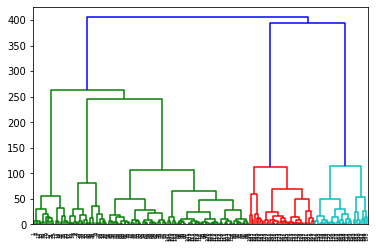

In [195]:
### write your code here

plot = sch.dendrogram(sch.linkage(customer[['Annual Income (k$)','Spending Score (1-100)']].values, method='ward'))

**Question:** Create an agglomerative cluster using your optimal number of clusters and plot a scatter diagram

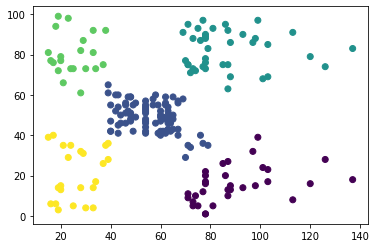

In [199]:
#Your code goes here
agg = AgglomerativeClustering(n_clusters = 5)
agg = agg.fit_predict(customer[['Annual Income (k$)','Spending Score (1-100)']])

plt.scatter(customer['Annual Income (k$)'], customer['Spending Score (1-100)'], c = agg)

**Question:** What do each of the clusters represent? Discuss.

**Answer:** There are five type of people:
1. High income high spending
2. Low income low spending
3. Medium income medium spending
4. High income low spending
5. Low income High spending

In [ ]:
%%shell
jupyter nbconvert --to html .ipynb